# FDU PRML 2023 Fall Assignment 1.1

Name: <田沐钊>
Student ID: <21307140069>

<font color='red'>**Deadline: 2023-09-25 23:59**</font>
<font color='red'>**Overall score weight: 40/100**</font>

In this semester, we are going to complete 3 assignments, each may contain **2-3 parts**. This is the first part of the first assignment, in which we aim to gain deeper understanding of some Machine Learning topics such as optimization and generalization. Besides, we are going to solve some real-world problems using the knowledge we have learned in class, namely Logitstic Regression, K-Nearest Neighbors and Decision Trees.

Before running the following code blocks, please first run
```
pip install numpy
pip install matplotlib
pip install -U scikit-learn
```

In [2]:
# Basic imports
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import rc
import sklearn

np.random.seed(42)
random.seed(42)

## 1. Understanding Optimization and Generalization (10 points)

Consider the examples in Exercise 1. Try to draw plots to answer the following questions:

- Draw a plot of how training error and test error vary with the polynomial degree $d$. In which part of the plot do we call underfit? Which part overfit?

- Use Ridge Regression (L2-Regularized Linear Regression) to fit the data with fixed degree of $d = 10$. Draw a plot of how training error and test error vary with the regularization parameter $\lambda$. In which part of the plot do we call "Underregularization"? Which part "Overregularization"?

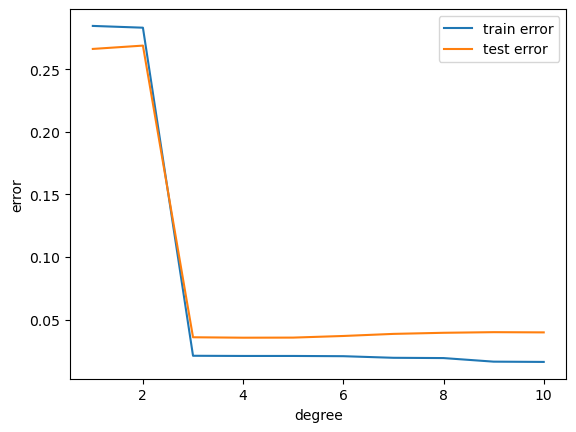

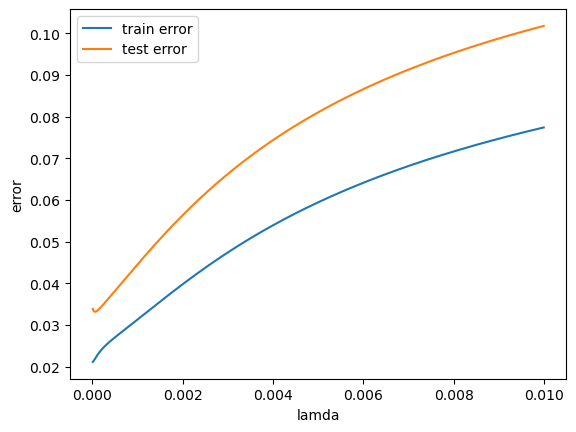

In [3]:
import math
#生成参数
def sin(x):
    y = np.sin(2 * math.pi * x)
    return y
def create_toy_data(func, interval, sample_num, noise = 0.0, add_outlier =False, outlier_ratio = 0.001):
    
    X = np.random.rand(sample_num,1) * (interval[1]-interval[0]) + interval[0]
    y = func(X)

    epsilon = np.random.normal(0, noise, (sample_num,1))
    y = y + epsilon

    if add_outlier:
        outlier_num = int(sample_num * outlier_ratio)
        if outlier_num != 0:
            outlier_idx = np.random.randint(sample_num, size = [outlier_num,1])
            y[outlier_idx] = y[outlier_idx] * 5
    return X, y

func = sin
interval = (0,1)
train_num = 20
test_num = 20
noise = 0.2
X_train, y_train = create_toy_data(func=func, interval=interval, sample_num=train_num, noise=noise)
X_test, y_test = create_toy_data(func=func, interval=interval,sample_num=test_num, noise=noise)


#普通的多项式拟合
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def compute_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

def compute_error(degree,X_train,y_train,X_test,y_test):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pre = model.predict(poly.fit_transform(X_test))
    y_train_pre=model.predict(X_train_poly)
    train_error=mean_squared_error(y_train_pre, y_train)
    test_error=mean_squared_error(y_test,y_pre)
    return train_error,test_error

d=list(range(1,11))
train_error, test_error=list(zip(*[compute_error(i,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test) for i in d]))

plt.plot(d, train_error, label='train error') 
plt.plot(d, test_error, label='test error') 

plt.xlabel('degree')  
plt.ylabel('error') 
plt.legend() 
plt.show()  

#使用了正则化的多项式拟合
from sklearn.linear_model import Ridge
def ridge(lamda,X_train,y_train,X_test,y_test):
    poly=PolynomialFeatures(degree=10)
    X_train_poly=poly.fit_transform(X_train)
    model=Ridge(alpha=lamda)
    model.fit(X_train_poly,y_train)

    y_pre = model.predict(poly.fit_transform(X_test))
    y_train_pre=model.predict(X_train_poly)
    train_error=mean_squared_error(y_train_pre, y_train)
    test_error=mean_squared_error(y_test,y_pre)
    return train_error,test_error

lamda=[i*0.00001 for i in range(1,1000)]
train_error, test_error=list(zip(*[ridge(i,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test) for i in lamda]))

plt.plot(lamda, train_error, label='train error') 
plt.plot(lamda, test_error, label='test error') 

plt.xlabel('lamda')  
plt.ylabel('error') 
plt.legend() 
plt.show()  


在第一张图，前2阶均欠拟合，8阶9阶均过拟合
在第二张图，λ在取0.001左右时最优，在这之前为欠正则化，在这之后为过正则化

## 2. Machine Learning with Tabular Data (30 points) 

Now we are about to face the real-world challenges with [Sklearn](https://scikit-learn.org/stable/#). In this section, we are going to solve a binary classification problem using the following three methods:

- Logistic Regression
- K-Nearest Neighbors
- Decision Trees

### 2.1 Dataset

We use a publicly available dataset about water potability from Kaggle. For each row in the datasets, there are some characteristics of a sampled bottle of water. Your task is to build a machine learning model to predict whether the water is safe to drink based on these features.

pH: The pH level of the water.
Hardness: Water hardness, a measure of mineral content.
Solids: Total dissolved solids in the water.
Chloramines: Chloramines concentration in the water.
Sulfate: Sulfate concentration in the water.
Conductivity: Electrical conductivity of the water.
Organic_carbon: Organic carbon content in the water.
Trihalomethanes: Trihalomethanes concentration in the water.
Turbidity: Turbidity level, a measure of water clarity.
Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

### 2.2 Exploratory Data Analysis (5 points)

Before we start to build our machine learning models, we need to first understand the dataset. The datasets are somehow corrupted with some missing entries **filled with -1**. We need to first process the data before we start to build our models.

So how do we treat the corrupted data? In this part, we **simply remove the corrupted rows or colomns** (only part of the columns are corrupted). Be simple in this part and improve your solution in the `Exploration` part.

In [4]:
import pandas as pd

df_train=pd.read_csv('water_potability_train.csv')
df_test=pd.read_csv('water_potability_test.csv')
df_train=df_train[df_train!=-1].dropna()
df_test=df_test[df_test!=-1].dropna()

x_train=(df_train.iloc[:, :-1].values).tolist()
y_train=(df_train.iloc[:,-1].values).tolist()
x_test=(df_test.iloc[:, :-1].values).tolist()
y_test=(df_test.iloc[:,-1].values).tolist()


### 2.3 Build your baselines

In this section, we will use sklearn to build our baseline models with kNN, decision tree, and logistic regression.

You may need to build the validation set yourself.
You can test whether your model can fit a few samples first, and then test on the full dataset.
You may need to test the speed of the vectorized implementation of several algorithms.
Visualization is encouraged.
Please follow standard machine learning procedures, i.e. you CANNOT use the test set at any time to tune the parameters of the model.

#### 2.3.1 kNN (5 points)

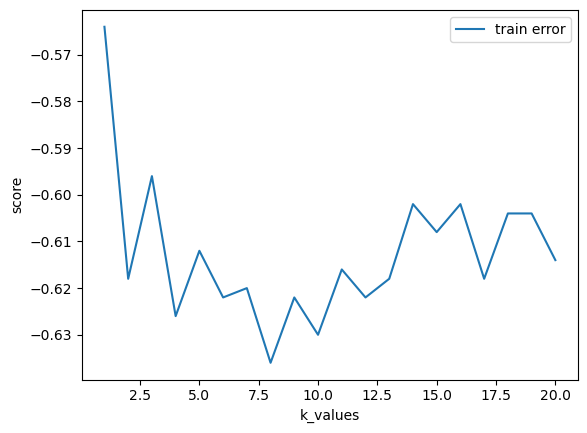

accuracy: 0.5420792079207921


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 定义要尝试的 k 值范围
k_values = list(range(1,21))
avg_scores=[0]*20

x_valid=x_train[:500]
y_valid=y_train[:500]

# 循环验证
best_k = None
best_score = float('inf')

for k in k_values:
    # 创建 k-NN 回归模型
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 执行交叉验证并计算均方误差
    scores = -cross_val_score(knn, x_valid, y_valid, cv=5, scoring='accuracy')
    avg_score = scores.mean()
    avg_scores[k-1]=avg_score

    if avg_score < best_score:
        best_k = k
        best_score = avg_score

plt.plot(k_values, avg_scores, label='train error') 

plt.xlabel('k_values')  
plt.ylabel('score') 
plt.legend() 
plt.show() 

knn = KNeighborsClassifier(n_neighbors=best_k) 

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

def count_same(list1, list2):
    count = 0
    for item1, item2 in zip(list1, list2):
        if item1 == item2:
            count += 1
    return count
acc=count_same(y_pred,y_test)/(len(y_test))
print('accuracy:',acc)

#### 2.3.2 Decision Tree (5 points)

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
acc=count_same(y_pred,y_test)/(len(y_test))
print('accuracy:',acc)

accuracy: 0.5866336633663366


#### 2.3.3 Logistic Regression (5 points)

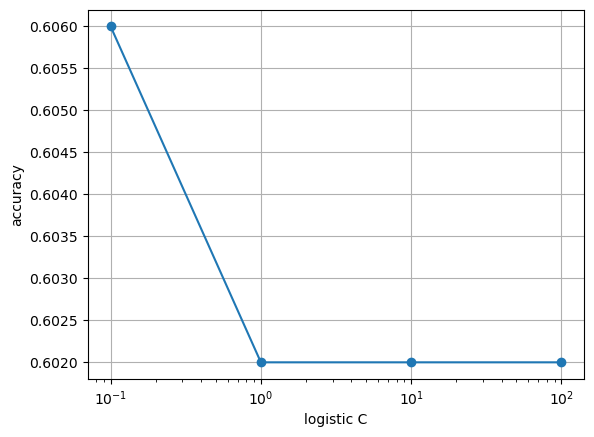

accuracy: 0.5965346534653465


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 创建逻辑回归模型
logreg = LogisticRegression()

pipe = Pipeline([
    ('scaler', StandardScaler()),  # 特征标准化
    ('logistic', LogisticRegression())  # 逻辑回归模型
])

# 定义参数网格
param_grid = {
    'logistic__C': [0.1, 1, 10, 100]  # 正则化参数C的候选值
}

# 使用网格搜索进行优化
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(x_valid, y_valid)

C_values = param_grid['logistic__C']
mean_scores = grid_search.cv_results_['mean_test_score']
plt.plot(C_values, mean_scores, marker='o')
plt.xscale('log')
plt.xlabel('logistic C')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

best_model = grid_search.best_estimator_

# 使用最佳模型进行训练和预测
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

acc=count_same(y_pred,y_test)/(len(y_test))
print('accuracy:',acc)


### 2.4 Exploration (10 points)

Now that you have built your baselines, you need to improve your solution. You can do more processing on the data, improve the model, adjust the evaluation indicators, and so on. You can explore and analyze as much as you can below.

在上面的数据处理中，可以不将整行或整列都删去，而是选择使用所有数据中该项的均值填入错误的-1项，完成数据填充，防止数据的浪费。

In [8]:
def fill_missing_values(data):
    data = np.array(data)
    num_rows, num_cols = data.shape
    for col in range(num_cols):
        column = data[:, col]
        non_missing_values = column[column != -1]
        if non_missing_values.size > 0:
            mean_value = non_missing_values.mean()
            column[column == -1] = mean_value
    return data.tolist()

train_data=fill_missing_values((df_train.iloc[:,:].values).tolist())
test_data=fill_missing_values((df_test.iloc[:,:].values).tolist())

x_train=train_data[:,:-1]
y_train=train_data[:,-1]
x_test=test_data[:, :-1]
y_test=test_data[:,-1]


TypeError: list indices must be integers or slices, not tuple

### 2.5 Conclusions

Write your conclusions here.


在本实验中，我首先通过对多项式拟合阶数和正则化系数的调整，对欠拟合、过拟合、欠正则化、过正则化等现象有了更加直观、清晰的了解。

之后，在使用kNN算法、决策树、逻辑回归对一个现实案例数据进行拟合时，通过对参数的交叉验证优化和网格搜索优化对不同模型的实际预测情况有了初步的了解。但无奈由于本次实验中使用的是既有的拓展包，所以很难对模型进行更进一步的主动优化。希望能在下一次实验对算法的亲手实现中尝试更多的优化模型的方案。